QUESTION-1 : Develop a neural network to classify handwritten digits using the MNIST dataset. The network
should learn to recognize digits from 0 to 9 based on pixel data

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load the dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images into a 1D vector
    layers.Dense(128, activation='relu'),  # Fully connected layer with 128 neurons
    layers.Dense(10, activation='softmax') # Output layer with 10 neurons (one for each digit)
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [3]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8800 - loss: 0.4241 - val_accuracy: 0.9581 - val_loss: 0.1421
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9646 - loss: 0.1199 - val_accuracy: 0.9677 - val_loss: 0.1091
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9769 - loss: 0.0774 - val_accuracy: 0.9746 - val_loss: 0.0821
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9832 - loss: 0.0542 - val_accuracy: 0.9736 - val_loss: 0.0818
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9870 - loss: 0.0427 - val_accuracy: 0.9729 - val_loss: 0.0866
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9901 - loss: 0.0317 - val_accuracy: 0.9787 - val_loss: 0.0764
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9913 - loss: 0.0261 - val_accuracy: 0.9792 - val_loss: 0.0722
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.9938 - loss: 0.020

313/313 - 1s - 4ms/step - accuracy: 0.9763 - loss: 0.0834
Test accuracy: 0.9763000011444092


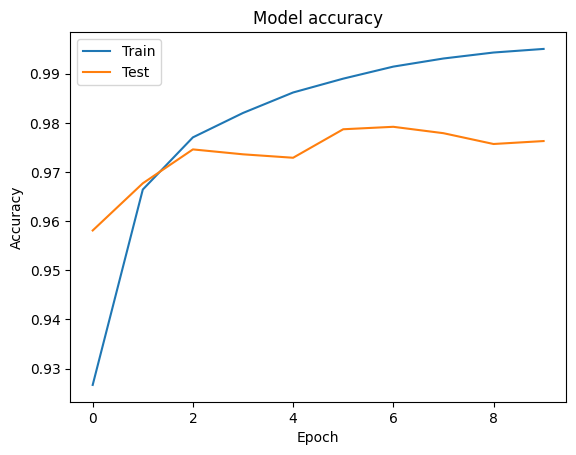

In [5]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


2nd QUESTION: Investigate the vanishing gradient problem in a deep neural network using Sigmoid activation, then
experiment with alternative activation functions (ReLU, Leaky ReLU) to mitigate the issue.

In [6]:
# Define a deep neural network with sigmoid activation
model_sigmoid = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(512, activation='sigmoid'),
    layers.Dense(512, activation='sigmoid'),
    layers.Dense(512, activation='sigmoid'),
    layers.Dense(10, activation='softmax')
])

model_sigmoid.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

# Train the model and observe the gradients
history_sigmoid = model_sigmoid.fit(train_images, train_labels, epochs=10,
                                    validation_data=(test_images, test_labels))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 17ms/step - accuracy: 0.7841 - loss: 0.6612 - val_accuracy: 0.9426 - val_loss: 0.1823
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9514 - loss: 0.1603 - val_accuracy: 0.9646 - val_loss: 0.1128
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.9696 - loss: 0.0955 - val_accuracy: 0.9637 - val_loss: 0.1189
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 49s 22ms/step - accuracy: 0.9775 - loss: 0.0703 - val_accuracy: 0.9701 - val_loss: 0.1008
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 22ms/step - accuracy: 0.9830 - loss: 0.0516 - val_accuracy: 0.9779 - val_loss: 0.0771
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9885 - loss: 0.0381 - val_accuracy: 0.9809 - val_loss: 0.0695
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9910 - loss: 0.0277 - val_accuracy: 0.9824 - val_loss: 0.0657
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.9926 -

In [7]:
# ReLU activation function
model_relu = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_relu.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

history_relu = model_relu.fit(train_images, train_labels, epochs=10,
                              validation_data=(test_images, test_labels))

# Leaky ReLU activation function
model_leaky_relu = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(512, activation='leaky_relu'),
    layers.Dense(512, activation='leaky_relu'),
    layers.Dense(512, activation='leaky_relu'),
    layers.Dense(10, activation='softmax')
])

model_leaky_relu.compile(optimizer='adam',
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'])

history_leaky_relu = model_leaky_relu.fit(train_images, train_labels, epochs=10,
                                          validation_data=(test_images, test_labels))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 19ms/step - accuracy: 0.9028 - loss: 0.3206 - val_accuracy: 0.9715 - val_loss: 0.0978
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9714 - loss: 0.0950 - val_accuracy: 0.9688 - val_loss: 0.1022
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 17ms/step - accuracy: 0.9802 - loss: 0.0656 - val_accuracy: 0.9737 - val_loss: 0.0917
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9846 - loss: 0.0504 - val_accuracy: 0.9778 - val_loss: 0.0825
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 17ms/step - accuracy: 0.9883 - loss: 0.0380 - val_accuracy: 0.9768 - val_loss: 0.0910
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 17ms/step - accuracy: 0.9892 - loss: 0.0361 - val_accuracy: 0.9806 - val_loss: 0.0682
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9915 - loss: 0.0267 - val_accuracy: 0.9792 - val_loss: 0.0868
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.9917 -

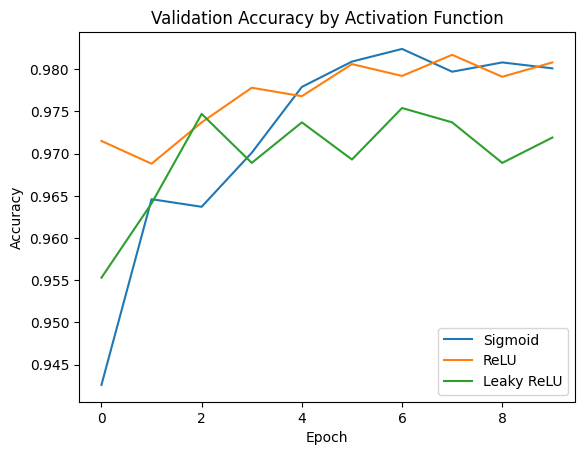

In [8]:
# Plot training & validation accuracy values for different activations
plt.plot(history_sigmoid.history['val_accuracy'], label='Sigmoid')
plt.plot(history_relu.history['val_accuracy'], label='ReLU')
plt.plot(history_leaky_relu.history['val_accuracy'], label='Leaky ReLU')
plt.title('Validation Accuracy by Activation Function')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()


Question-3 : Implement a neural network using three different weight initialization methods (Zero Initialization,
Random Initialization, Xavier Initialization) and compare their effects on training convergence and
performance using the CIFAR-10 dataset

In [9]:
from tensorflow.keras.initializers import Zeros, RandomNormal, GlorotNormal

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [10]:
def create_model(initializer):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer=initializer, input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer=initializer),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer=initializer),
        layers.Flatten(),
        layers.Dense(64, activation='relu', kernel_initializer=initializer),
        layers.Dense(10, activation='softmax', kernel_initializer=initializer)
    ])
    return model


In [11]:
# Zero Initialization
model_zero = create_model(Zeros())
model_zero.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_zero = model_zero.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Random Initialization
model_random = create_model(RandomNormal())
model_random.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_random = model_random.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Xavier Initialization (Glorot)
model_xavier = create_model(GlorotNormal())
model_xavier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_xavier = model_xavier.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 49ms/step - accuracy: 0.0973 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 46ms/step - accuracy: 0.0999 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 89s 51ms/step - accuracy: 0.0983 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 47ms/step - accuracy: 0.0986 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 46ms/step - accuracy: 0.0992 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 46ms/step - accuracy: 0.1027 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 48ms/step - accuracy: 0.1001 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 47ms/step - accuracy: 0.0977 -

In [12]:
# Plot training & validation accuracy values for different initializations
plt.plot(history_zero.history['val_accuracy'], label='Zero Initialization')
plt.plot(history_random.history['val_accuracy'], label='Random Initialization')
plt.plot(history_xavier.history['val_accuracy'], label='Xavier Initialization')
plt.title('Validation Accuracy by Weight Initialization')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()


Question-4 :  Implement the backpropagation algorithm from scratch for a multi-layer neural network. Train the
network on the XOR problem, and analyze how the gradients are propagated through the network.
Additionally, explore the effect of different learning rates on the convergence and final accuracy of the
model.


In [13]:
import numpy as np

# XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])


In [14]:
# Initialize parameters
def initialize_parameters():
    np.random.seed(1)
    W1 = np.random.randn(2, 2) * 0.01
    b1 = np.zeros((1, 2))
    W2 = np.random.randn(2, 1) * 0.01
    b2 = np.zeros((1, 1))
    return W1, b1, W2, b2

# Sigmoid activation function
def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

# Forward propagation
def forward_propagation(X, W1, b1, W2, b2):
    Z1 = np.dot(X, W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)
    return Z1, A1, Z2, A2


In [15]:
# Backward propagation
def backward_propagation(X, y, Z1, A1, Z2, A2, W2):
    m = y.shape[0]
    dZ2 = A2 - y
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m
    dZ1 = np.dot(dZ2, W2.T) * A1 * (1 - A1)
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m
    return dW1, db1, dW2, db2


In [16]:
def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    return W1, b1, W2, b2


In [21]:
def train(X, y, learning_rate, num_iterations):
    W1, b1, W2, b2 = initialize_parameters()
    for i in range(num_iterations):
        Z1, A1, Z2, A2 = forward_propagation(X, W1, b1, W2, b2)
        dW1, db1, dW2, db2 = backward_propagation(X, y, Z1, A1, Z2, A2, W2)
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
    return W1, b1, W2, b2

W1, b1, W2, b2 = train(X, y, learning_rate=1, num_iterations=10000)


In [22]:
def predict(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_propagation(X, W1, b1, W2, b2)
    return (A2 > 0.5).astype(int)

# Predictions
predictions = predict(X, W1, b1, W2, b2)
print("Predictions:", predictions)


Predictions: [[0]
 [0]
 [1]
 [1]]
